- KNearestNeighbor -
KNN digunakan untuk klasifikasi dan regresi. K-NN bekerja dengan cara menemukan kategori atau nilai target dari suatu data baru dengan cara membandingkan dengan data yang ada dalam kumpulan data.

Preparing Dataset

In [25]:
import pandas as pd

### data dictionary
data = {
        "iq" : [110, 90, 40, 76, 23, 130, 218, 190, 41, 86, 66, 177, 139, 54, 62],
        "jk" : ['pria','wanita', 'pria', 'pria','pria', 'wanita', 'wanita', 'pria', 'wanita', 'pria', 'wanita', 'wanita','wanita', 'pria','pria'],
        "attitude" : ['baik', 'buruk','buruk','buruk','baik','baik', 'buruk', 'baik','baik', 'buruk', 'baik', 'baik', 'buruk', 'baik','buruk']
        }
dataset = pd.DataFrame(data)
dataset

,iq,jk,attitude
0,110,pria,baik
1,90,wanita,buruk
2,40,pria,buruk
3,76,pria,buruk
4,23,pria,baik
5,130,wanita,baik
6,218,wanita,buruk
7,190,pria,baik
8,41,wanita,baik
9,86,pria,buruk


Visualisasi data

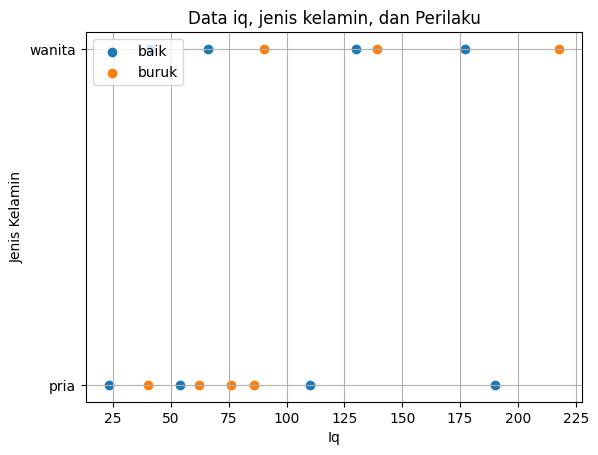

In [26]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots()

for attitude, x in dataset.groupby('attitude'):
    axis.scatter(x['iq'], x['jk'], label=attitude)

plt.legend(loc='upper left')
plt.title('Data iq, jenis kelamin, dan Perilaku')
plt.xlabel('Iq')
plt.ylabel('Jenis Kelamin')
plt.grid(True)
plt.show()

Preproccesing Dataset

In [27]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
jk = lb.fit_transform(dataset['jk'])

X_train = np.column_stack((dataset['iq'], jk))
y_train = np.array(dataset['attitude'])

y_train = lb.fit_transform(y_train) 
y_train = y_train.flatten() # merubah menjadi array 1 dimensi
print(X_train)
print(y_train)


[[110   0]
 [ 90   1]
 [ 40   0]
 [ 76   0]
 [ 23   0]
 [130   1]
 [218   1]
 [190   0]
 [ 41   1]
 [ 86   0]
 [ 66   1]
 [177   1]
 [139   1]
 [ 54   0]
 [ 62   0]]
[0 1 1 1 0 0 1 0 0 1 0 0 1 0 1]


Training KNN Classification Model

In [28]:
from sklearn.neighbors import KNeighborsClassifier

neigbors = 3 
model = KNeighborsClassifier(n_neighbors= neigbors)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Prediksi Attitude 

In [36]:
iq = 145
jenis_kelamin = 1 

X_new = np.array([iq, jenis_kelamin]).reshape(1, -1)
### atau bisa langsung di tuliskan sebagai berikut:
### X_new = [[145, 'wanita']]

print(X_new)

[[145   1]]


In [42]:
y_new = model.predict(X_new)
y_new


array([0])

In [43]:
lb.inverse_transform(y_new) 

### berarti dengan iq = 145 dan jenis kelamin = wanita
### di prediksi dengan model bahwa akan memiliki attitude = baik

array(['baik'], dtype='<U5')

Visualisasi Neigbors

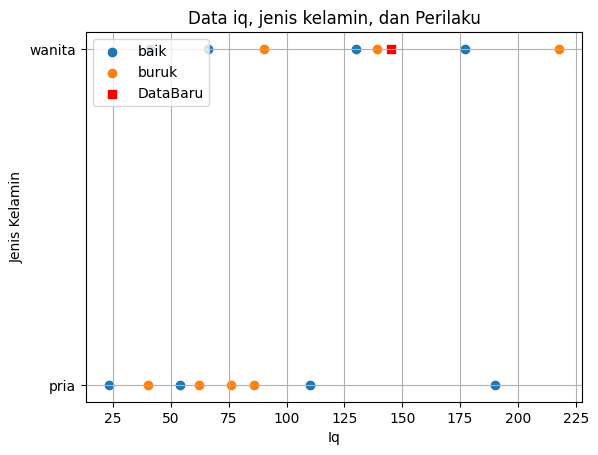

In [44]:
figure, axis = plt.subplots()

for attitude, x in dataset.groupby('attitude'):
    axis.scatter(x['iq'], x['jk'], label=attitude)

plt.scatter(iq, jenis_kelamin, marker='s', color='red', label='DataBaru')

plt.legend(loc='upper left')
plt.title('Data iq, jenis kelamin, dan Perilaku')
plt.xlabel('Iq')
plt.ylabel('Jenis Kelamin')
plt.grid(True)
plt.show()


Dengan Grafik diatas Bisa dilihat 3 tetangga terdekatnya adalah 2 attitude = baik dan 1 = buruk

Evaluasi Model

In [64]:
X_test = np.array(
[[110  , 0],
 [ 90  , 1],
 [ 40 ,  0],
 [ 76  , 0],
 [ 23  , 0],])

y_test = lb.transform(np.array(['baik','buruk','buruk','buruk','baik'])).flatten()

print(f'X_test:\n{X_test}')
print(f'y_test:\n{y_test}')

X_test:
[[110   0]
 [ 90   1]
 [ 40   0]
 [ 76   0]
 [ 23   0]]
y_test:
[0 1 1 1 0]


In [62]:
### prediksi X_test dengan harapan mendakati dengan y_test
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0])

Model Accuracy

In [66]:
### Akurasi mengacu pada seberapa dekat suatu pengukuran dengan nilai sebenarnya atau nilai yang diterima sebagai benar.
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred) ### membandingkan hasil y_test dengan y_pred
acc
### 0.8 = 80%, jadi akurasi modelnya adalah 80%

0.8

Model Precision

In [67]:
### Presisi mengacu pada seberapa dekat atau seberapa konsisten suatu set data pengukuran terhadap satu sama lain.
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)
prec

1.0

Model Recall

In [68]:
### Recall digunakan untuk mengukur sejauh mana model mampu mengidentifikasi semua contoh positif yang sebenarnya.

from sklearn.metrics import recall_score
rec = recall_score(y_test,y_pred)
rec

0.6666666666666666

Model F1 Score

In [69]:
### F1-Score: Merupakan rata-rata harmonik dari presisi dan recall. Ini memberikan keseimbangan antara kedua metrik tersebut.

from sklearn.metrics import f1_score
f1s = f1_score(y_test, y_pred)
f1s

0.8

Classification Report

In [71]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

